MACHINE LEARNING - DATASET - diabetes data set from kaggle


CSE(AIML)

In [ ]:
!pip freeze > requirements.txt

data preprocessing

First 5 rows of the dataset:
    Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1  

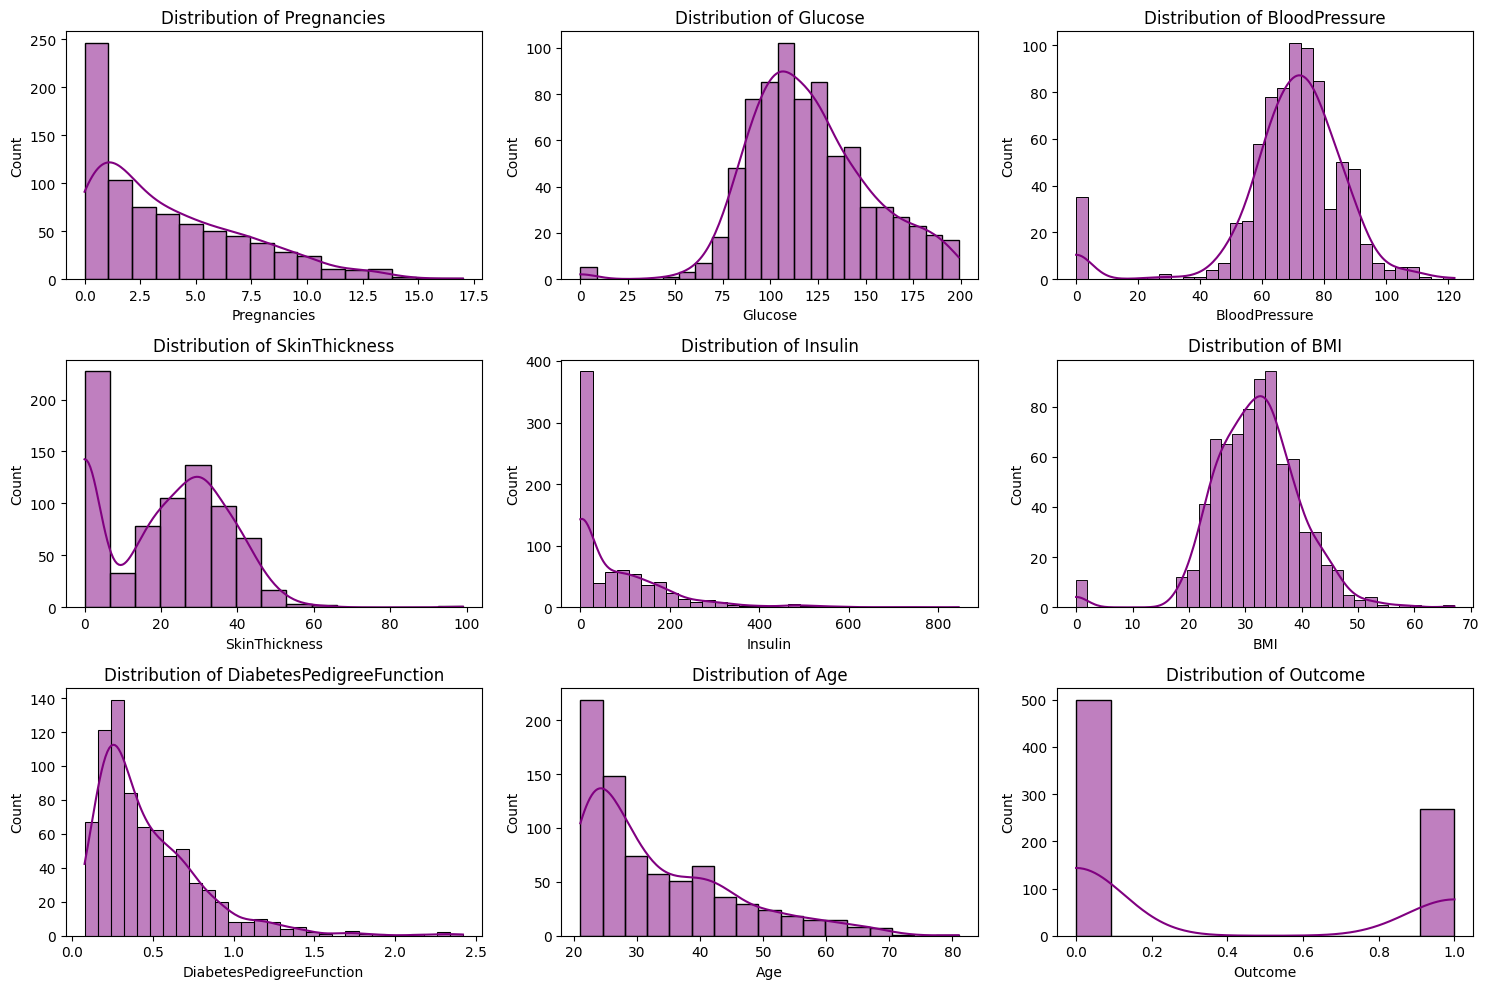

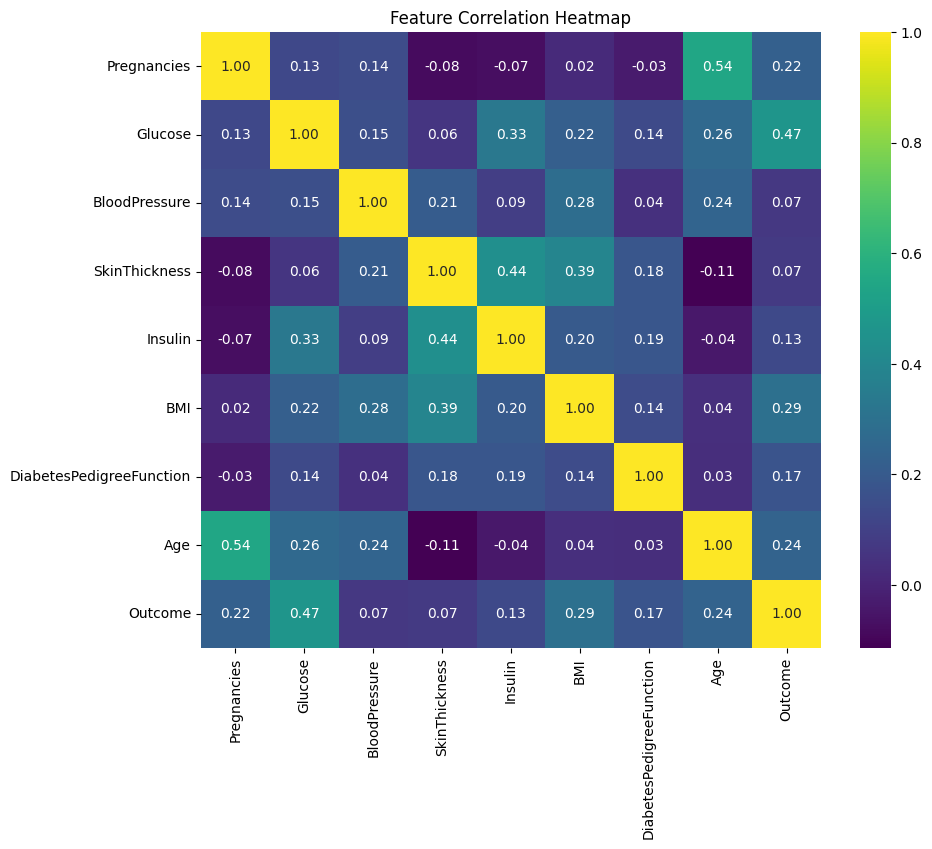


First 5 rows after Standardization:
    Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.639947  0.848324       0.149641       0.907270 -0.692891  0.204013   
1    -0.844885 -1.123396      -0.160546       0.530902 -0.692891 -0.684422   
2     1.233880  1.943724      -0.263941      -1.288212 -0.692891 -1.103255   
3    -0.844885 -0.998208      -0.160546       0.154533  0.123302 -0.494043   
4    -1.141852  0.504055      -1.504687       0.907270  0.765836  1.409746   

   DiabetesPedigreeFunction       Age  
0                  0.468492  1.425995  
1                 -0.365061 -0.190672  
2                  0.604397 -0.105584  
3                 -0.920763 -1.041549  
4                  5.484909 -0.020496  

✅ Preprocessing complete! Data is now standardized and split for training.


In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Load the dataset
data = pd.read_csv('diabetes.csv')
print("First 5 rows of the dataset:\n", data.head())

# Show dataset info
print("\nDataset Info:\n", data.info())

# Check for missing values
print("\nMissing Values:\n", data.isnull().sum())

# Exploratory Data Analysis (EDA)
print("\nDataset Description:\n", data.describe())

# Visualize data distributions
plt.figure(figsize=(15, 10))
for i, column in enumerate(data.columns):
    plt.subplot(3, 3, i+1)
    sns.histplot(data[column], kde=True, color='purple')
    plt.title(f"Distribution of {column}")
plt.tight_layout()
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='viridis', fmt='.2f')
plt.title("Feature Correlation Heatmap")
plt.show()

# Split features and target
X = data.drop('Outcome', axis=1)
y = data['Outcome']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

standardized_df = pd.DataFrame(X_scaled, columns=X.columns)
print("\nFirst 5 rows after Standardization:\n", standardized_df.head())

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print("\n✅ Preprocessing complete! Data is now standardized and split for training.")


Logistic Regression

Logistic Regression Performance:
Accuracy: 0.7532467532467533
Precision: 0.6491228070175439
Recall: 0.6727272727272727
F1 Score: 0.6607142857142857
Confusion Matrix:
 [[79 20]
 [18 37]]


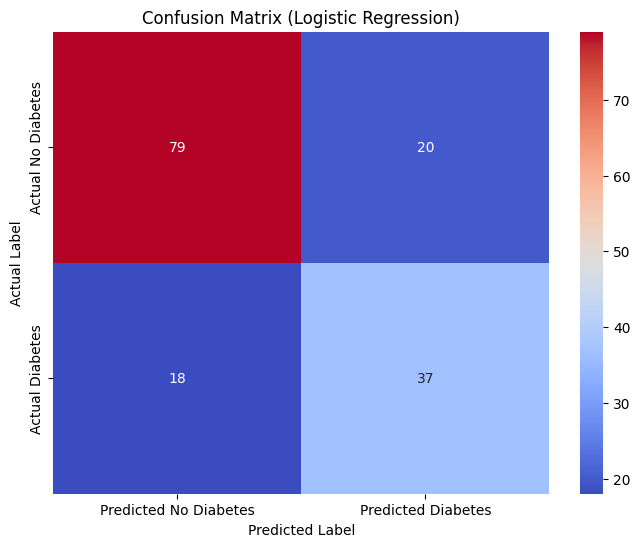

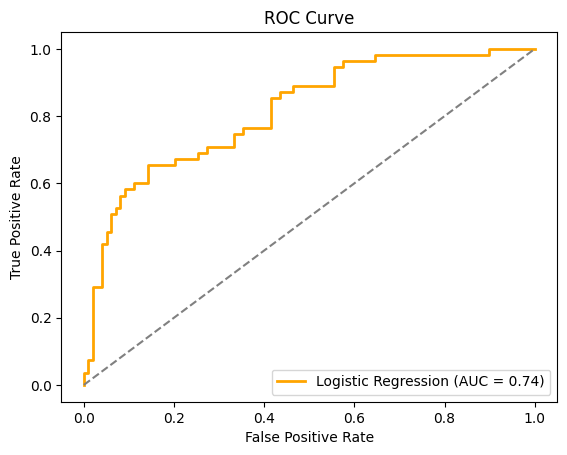

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, roc_auc_score

# Create and train the model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Make predictions
y_pred_log = log_reg.predict(X_test)

# Evaluate performance
print("Logistic Regression Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print("Precision:", precision_score(y_test, y_pred_log))
print("Recall:", recall_score(y_test, y_pred_log))
print("F1 Score:", f1_score(y_test, y_pred_log))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log))

# Improved Confusion Matrix Visualization with clearer labels
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_log), annot=True, cmap='coolwarm', fmt='d',
            xticklabels=["Predicted No Diabetes", "Predicted Diabetes"],
            yticklabels=["Actual No Diabetes", "Actual Diabetes"])
plt.title("Confusion Matrix (Logistic Regression)")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, log_reg.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr, color='orange', lw=2, label="Logistic Regression (AUC = {:.2f})".format(roc_auc_score(y_test, y_pred_log)))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()


KNN- k-Nearest Neighbors

KNN Performance:
Accuracy: 0.6883116883116883
Precision: 0.574468085106383
Recall: 0.4909090909090909
F1 Score: 0.5294117647058824
Confusion Matrix:
 [[79 20]
 [28 27]]


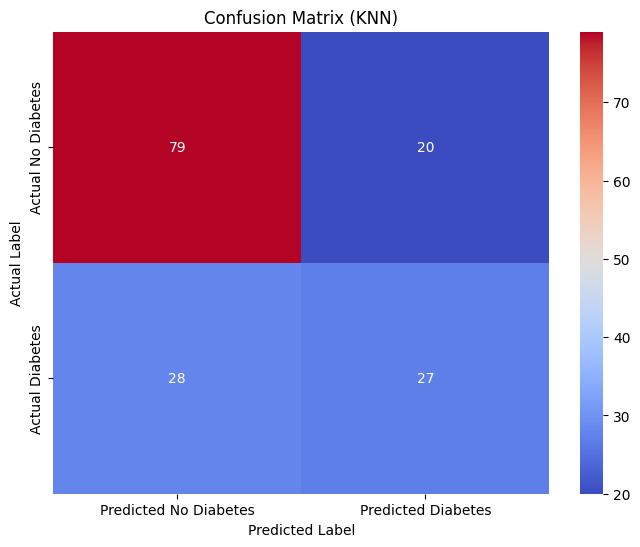

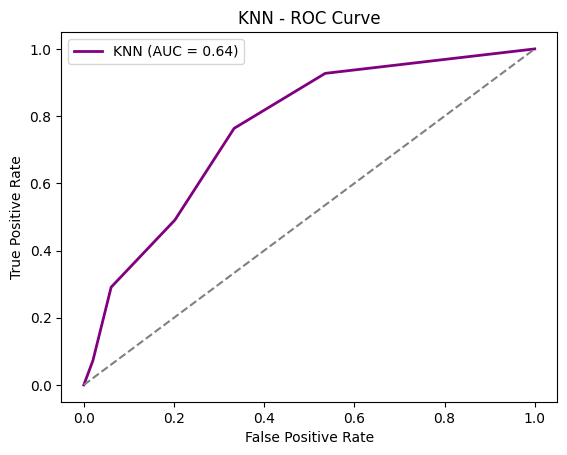

In [3]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, roc_auc_score

# Create and train the KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Make predictions
y_pred_knn = knn.predict(X_test)

# Evaluate performance
print("KNN Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Precision:", precision_score(y_test, y_pred_knn))
print("Recall:", recall_score(y_test, y_pred_knn))
print("F1 Score:", f1_score(y_test, y_pred_knn))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))

# Improved Confusion Matrix Visualization with clearer labels
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, cmap='coolwarm', fmt='d',
            xticklabels=["Predicted No Diabetes", "Predicted Diabetes"],
            yticklabels=["Actual No Diabetes", "Actual Diabetes"])
plt.title("Confusion Matrix (KNN)")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

# ROC Curve for KNN
fpr, tpr, _ = roc_curve(y_test, knn.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr, color='purple', lw=2, label="KNN (AUC = {:.2f})".format(roc_auc_score(y_test, y_pred_knn)))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("KNN - ROC Curve")
plt.show()


SVM- Support Vector Machine

SVM Performance:
Accuracy: 0.7597402597402597
Precision: 0.6666666666666666
Recall: 0.6545454545454545
F1 Score: 0.6605504587155964
Confusion Matrix:
 [[81 18]
 [19 36]]


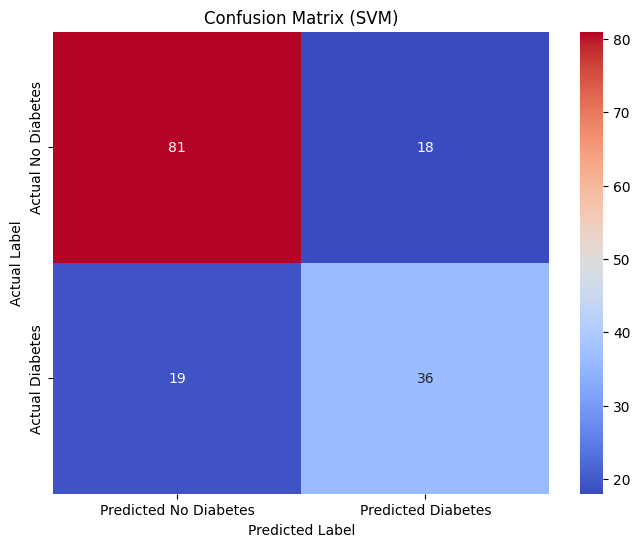

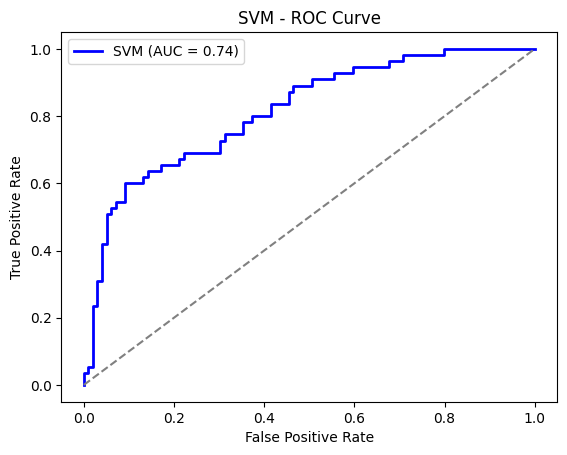

In [5]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, roc_auc_score

# Create and train the SVM model
svm_model = SVC(kernel='linear', probability=True)
svm_model.fit(X_train, y_train)

# Make predictions
y_pred_svm = svm_model.predict(X_test)

# Evaluate performance
print("SVM Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Precision:", precision_score(y_test, y_pred_svm))
print("Recall:", recall_score(y_test, y_pred_svm))
print("F1 Score:", f1_score(y_test, y_pred_svm))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))

# Improved Confusion Matrix Visualization with clearer labels
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, cmap='coolwarm', fmt='d',
            xticklabels=["Predicted No Diabetes", "Predicted Diabetes"],
            yticklabels=["Actual No Diabetes", "Actual Diabetes"])
plt.title("Confusion Matrix (SVM)")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

# ROC Curve for SVM
fpr, tpr, _ = roc_curve(y_test, svm_model.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr, color='blue', lw=2, label="SVM (AUC = {:.2f})".format(roc_auc_score(y_test, y_pred_svm)))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("SVM - ROC Curve")
plt.show()


Decision Tree

Decision Tree Performance:
Accuracy: 0.7467532467532467
Precision: 0.625
Recall: 0.7272727272727273
F1 Score: 0.6722689075630253
Confusion Matrix:
 [[75 24]
 [15 40]]


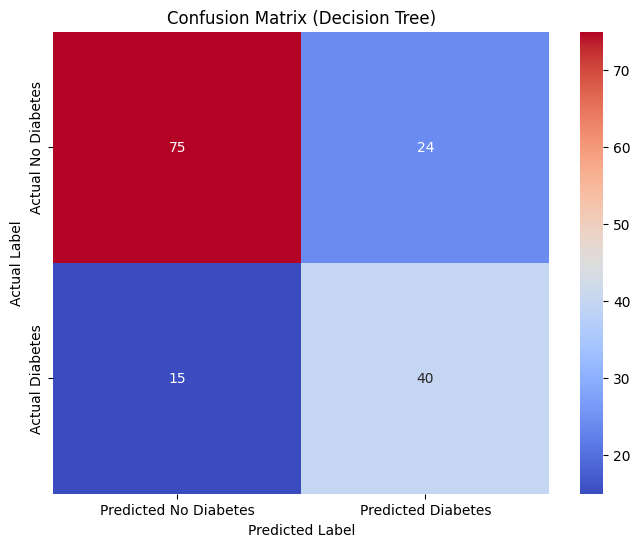

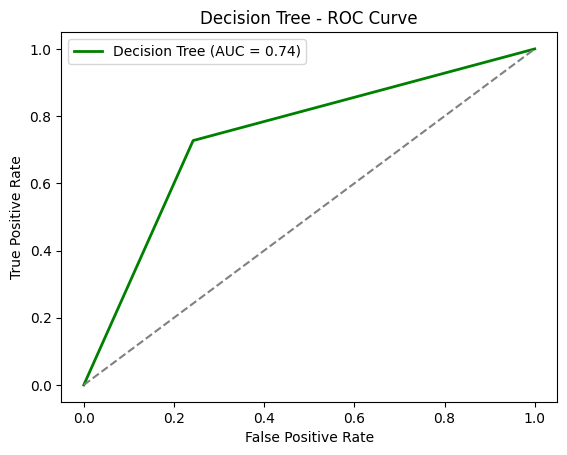

In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, roc_auc_score

# Create and train the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Make predictions
y_pred_dt = dt_model.predict(X_test)

# Evaluate performance
print("Decision Tree Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Precision:", precision_score(y_test, y_pred_dt))
print("Recall:", recall_score(y_test, y_pred_dt))
print("F1 Score:", f1_score(y_test, y_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))

# Improved Confusion Matrix Visualization with clearer labels
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, cmap='coolwarm', fmt='d',
            xticklabels=["Predicted No Diabetes", "Predicted Diabetes"],
            yticklabels=["Actual No Diabetes", "Actual Diabetes"])
plt.title("Confusion Matrix (Decision Tree)")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

# ROC Curve for Decision Tree
fpr, tpr, _ = roc_curve(y_test, dt_model.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr, color='green', lw=2, label="Decision Tree (AUC = {:.2f})".format(roc_auc_score(y_test, y_pred_dt)))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Decision Tree - ROC Curve")
plt.show()


Random Forest

Random Forest Performance:
Accuracy: 0.7272727272727273
Precision: 0.6181818181818182
Recall: 0.6181818181818182
F1 Score: 0.6181818181818182
Confusion Matrix:
 [[78 21]
 [21 34]]


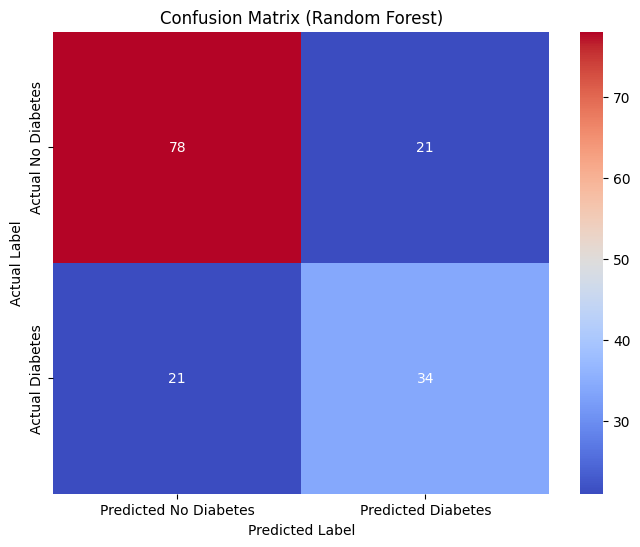

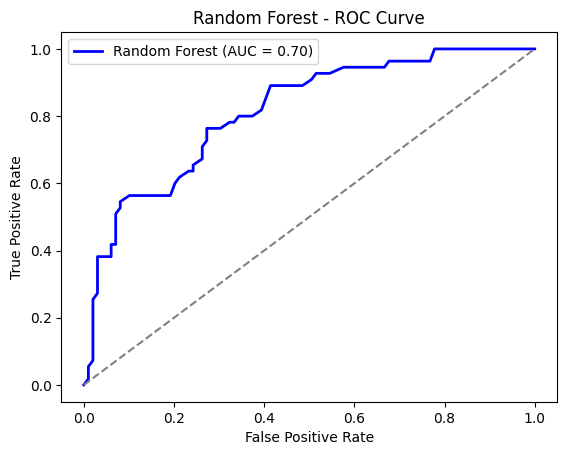

In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, roc_auc_score

# Create and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate performance
print("Random Forest Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf))
print("F1 Score:", f1_score(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

# Improved Confusion Matrix Visualization with clear labels
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, cmap='coolwarm', fmt='d',
            xticklabels=["Predicted No Diabetes", "Predicted Diabetes"],
            yticklabels=["Actual No Diabetes", "Actual Diabetes"])
plt.title("Confusion Matrix (Random Forest)")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

# ROC Curve for Random Forest
fpr, tpr, _ = roc_curve(y_test, rf_model.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr, color='blue', lw=2, label="Random Forest (AUC = {:.2f})".format(roc_auc_score(y_test, y_pred_rf)))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Random Forest - ROC Curve")
plt.show()


comparison of accuracy


Model Performance Comparison:

                 Model  Accuracy  Precision    Recall  F1 Score
0  Logistic Regression  0.753247   0.649123  0.672727  0.660714
1  K-Nearest Neighbors  0.688312   0.574468  0.490909  0.529412
2                  SVM  0.759740   0.666667  0.654545  0.660550
3        Decision Tree  0.746753   0.625000  0.727273  0.672269
4        Random Forest  0.727273   0.618182  0.618182  0.618182


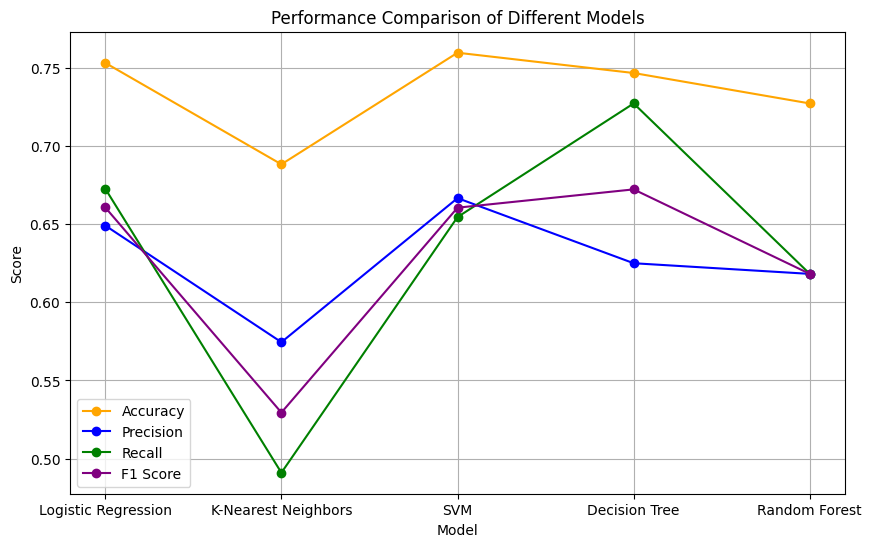


✅ Best Model: SVM with Accuracy: 0.76


In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Collect performance metrics for each model
models = ["Logistic Regression", "K-Nearest Neighbors", "SVM", "Decision Tree", "Random Forest"]
accuracies = [
    accuracy_score(y_test, y_pred_log),
    accuracy_score(y_test, y_pred_knn),
    accuracy_score(y_test, y_pred_svm),
    accuracy_score(y_test, y_pred_dt),
    accuracy_score(y_test, y_pred_rf)
]

precisions = [
    precision_score(y_test, y_pred_log),
    precision_score(y_test, y_pred_knn),
    precision_score(y_test, y_pred_svm),
    precision_score(y_test, y_pred_dt),
    precision_score(y_test, y_pred_rf)
]

recalls = [
    recall_score(y_test, y_pred_log),
    recall_score(y_test, y_pred_knn),
    recall_score(y_test, y_pred_svm),
    recall_score(y_test, y_pred_dt),
    recall_score(y_test, y_pred_rf)
]

f1_scores = [
    f1_score(y_test, y_pred_log),
    f1_score(y_test, y_pred_knn),
    f1_score(y_test, y_pred_svm),
    f1_score(y_test, y_pred_dt),
    f1_score(y_test, y_pred_rf)
]

# Create a DataFrame to summarize the results
results_df = pd.DataFrame({
    "Model": models,
    "Accuracy": accuracies,
    "Precision": precisions,
    "Recall": recalls,
    "F1 Score": f1_scores
})

# Display the performance table
print("\nModel Performance Comparison:\n")
print(results_df)

# Visualization of model performance
plt.figure(figsize=(10, 6))
for metric, color in zip(["Accuracy", "Precision", "Recall", "F1 Score"], ["orange", "blue", "green", "purple"]):
    plt.plot(models, results_df[metric], marker='o', label=metric, color=color)

plt.title("Performance Comparison of Different Models")
plt.xlabel("Model")
plt.ylabel("Score")
plt.legend()
plt.grid(True)
plt.show()

# Highlight the best model
best_model = results_df.sort_values(by="Accuracy", ascending=False).iloc[0]
print(f"\n✅ Best Model: {best_model['Model']} with Accuracy: {best_model['Accuracy']:.2f}")


I got high accuracy using SVM so using SVM to predict whether the person has diabetes or not.

In [9]:
# Example: Predict Diabetes from Custom User Input
import numpy as np

# Feature order: ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
#                 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

def predict_diabetes(model, scaler):
    print("\nEnter the following health parameters:")
    user_input = []
    fields = ['Pregnancies', 'Glucose', 'Blood Pressure', 'Skin Thickness',
              'Insulin', 'BMI', 'Diabetes Pedigree Function', 'Age']

    for field in fields:
        value = float(input(f"{field}: "))
        user_input.append(value)

    # Convert to numpy array and reshape
    user_array = np.array(user_input).reshape(1, -1)

    # Standardize input like training data
    import pandas as pd
    user_df = pd.DataFrame(user_array, columns=X.columns)
    user_array_scaled = scaler.transform(user_df)


    # Make prediction
    prediction = model.predict(user_array_scaled)[0]

    if prediction == 1:
        print("\n🔴 The model predicts that the person is **Diabetic**.")
    else:
        print("\n🟢 The model predicts that the person is **Non-Diabetic**.")

# Example usage
predict_diabetes(svm_model, scaler)



Enter the following health parameters:
Pregnancies: 1
Glucose: 85
Blood Pressure: 75
Skin Thickness: 20
Insulin: 70
BMI: 22
Diabetes Pedigree Function: 0.2
Age: 25

🟢 The model predicts that the person is **Non-Diabetic**.
